Thank you for belowing authors from whose articles we learn the LSTM model and ARIMA model.

Reference:

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

https://www.kaggle.com/arjunsurendran/using-lstm-on-training-data/

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://www.kaggle.com/muonneutrino/wikipedia-traffic-data-exploration/







In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
train = pd.read_csv('/content/drive/My Drive/train_2.csv').fillna(0)
page = train['Page']
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [0]:
train = train.drop('Page',axis = 1)

In [0]:
train.shape

(145063, 803)

In [0]:
train.head(106)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,8.0,5.0,7.0,8.0,10.0,8.0,5.0,3.0,5.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,74.0,39.0,11.0,55.0,71.0,44.0,25.0,39.0,25.0,50.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,53.0,107.0,63.0,42.0,24.0,44.0,33.0,52.0,21.0,48.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,20.0,16.0,22.0,19.0,21.0,32.0,34.0,29.0,23.0,25.0


In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
from numpy import array
 
# define input sequence
row = train.iloc[105,:].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(row, n_steps)

In [0]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))

In [0]:
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [0]:
X_train = np.reshape(X_train, (560,3,1))

In [0]:
y_train.shape

(560, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import regularizers
from keras.layers import LSTM 
#hidden_nodes = int(2/3 * (3 * 1))
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(None, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
560/560 [==============================] - 2s 3ms/step - loss: 0.0361
Epoch 2/200
560/560 [==============================] - 0s 249us/step - loss: 0.0264
Epoch 3/200
560/560 [==============================] - 0s 235us/step - loss: 0.0191
Epoch 4/200
560/560 [==============================] - 0s 229us/step - loss: 0.0138
Epoch 5/200
560/560 [==============================] - 0s 234us/step - loss: 0.0112
Epoch 6/200
560/560 [==============================] - 0s 233us/step - loss: 0.0102
Epoch 7/200
560/560 [==============================] - 0s 236us/step - loss: 0.0100
Epoch 8/200
560/560 [==============================] - 0s 233us/step - loss: 0.0099
Epoch 9/200
560/560 [==============================] - 0s 233us/step - loss: 0.0099
Epoch 10/200
560/560 [==============================] - 0s 251us/step - loss: 0.0097
Epoch 11/200
560/560 [==============================] - 0s 248us/step - loss: 0.0096
Epoch 12/200
560/560 [==============================] - 0s 255us/step - loss

In [0]:
X_test_copy = X_test
X_test_copy = np.reshape(X_test_copy,(-1,1))
X_test_copy = sc.transform(X_test_copy)

In [0]:
X_test.shape

(240, 3, 1)

In [0]:
X_test_copy.shape

(720, 1)

In [0]:
X_test_copy = np.reshape(X_test_copy, (240, 3, 1))
y_pred = model.predict(X_test_copy)
y_pred = sc.inverse_transform(y_pred)

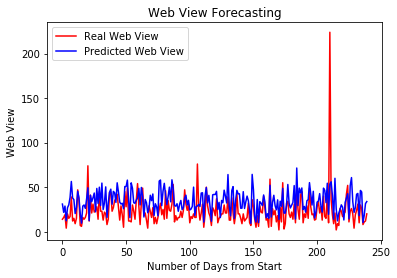

In [0]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [0]:
# Stacked LSTM

In [0]:
model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(None, 1)))
model.add(LSTM(20, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
560/560 [==============================] - 3s 6ms/step - loss: 0.0370
Epoch 2/200
560/560 [==============================] - 0s 414us/step - loss: 0.0269
Epoch 3/200
560/560 [==============================] - 0s 401us/step - loss: 0.0176
Epoch 4/200
560/560 [==============================] - 0s 416us/step - loss: 0.0122
Epoch 5/200
560/560 [==============================] - 0s 405us/step - loss: 0.0110
Epoch 6/200
560/560 [==============================] - 0s 422us/step - loss: 0.0108
Epoch 7/200
560/560 [==============================] - 0s 418us/step - loss: 0.0106
Epoch 8/200
560/560 [==============================] - 0s 402us/step - loss: 0.0103
Epoch 9/200
560/560 [==============================] - 0s 402us/step - loss: 0.0099
Epoch 10/200
560/560 [==============================] - 0s 406us/step - loss: 0.0096
Epoch 11/200
560/560 [==============================] - 0s 413us/step - loss: 0.0091
Epoch 12/200
560/560 [==============================] - 0s 408us/step - loss

In [0]:
y_pred_stack = model.predict(X_test_copy)
y_pred_stack = sc.inverse_transform(y_pred_stack)

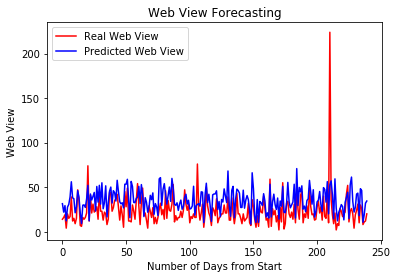

In [0]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred_stack, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [0]:
from keras.layers import Bidirectional
# define model
model_bidirect = Sequential()
model_bidirect.add(Bidirectional(LSTM(4, activation='relu'), input_shape=(None, 1)))
model_bidirect.add(Dense(1))
model_bidirect.compile(optimizer='adam', loss='mse')

In [0]:
model_bidirect.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
560/560 [==============================] - 4s 7ms/step - loss: 0.0393
Epoch 2/200
560/560 [==============================] - 0s 393us/step - loss: 0.0298
Epoch 3/200
560/560 [==============================] - 0s 368us/step - loss: 0.0231
Epoch 4/200
560/560 [==============================] - 0s 370us/step - loss: 0.0180
Epoch 5/200
560/560 [==============================] - 0s 388us/step - loss: 0.0146
Epoch 6/200
560/560 [==============================] - 0s 414us/step - loss: 0.0122
Epoch 7/200
560/560 [==============================] - 0s 381us/step - loss: 0.0109
Epoch 8/200
560/560 [==============================] - 0s 384us/step - loss: 0.0101
Epoch 9/200
560/560 [==============================] - 0s 378us/step - loss: 0.0098
Epoch 10/200
560/560 [==============================] - 0s 377us/step - loss: 0.0097
Epoch 11/200
560/560 [==============================] - 0s 393us/step - loss: 0.0096
Epoch 12/200
560/560 [==============================] - 0s 393us/step - loss

In [0]:
y_pred_bidirect = model.predict(X_test_copy)
y_pred_bidirect = sc.inverse_transform(y_pred_bidirect)

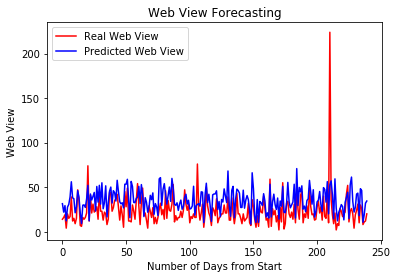

In [0]:
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred_bidirect, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [0]:
#Arima

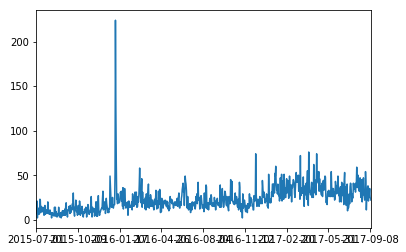

In [0]:
from pandas import datetime
from matplotlib import pyplot
import numpy as np

row = train.iloc[105]
row.plot()

In [0]:
print(row.values)

[  7.  10.  21.   2.   9.  13.   7.   6.   7.  23.  22.   8.  15.  10.
  11.   9.  14.   9.  12.   5.  13.  16.   6.   9.  10.  11.   7.   8.
  20.   7.   7.   9.   6.  11.   8.   6.   8.   2.   8.   6.   5.   7.
   7.   4.  14.   5.  14.   4.   9.   4.   3.   6.   7.   5.  14.   6.
   3.   5.   6.   8.   2.   6.   4.  10.   5.   9.  10.   5.  10.  12.
   5.  17.  19.   6.  10.   3.  11.  11.  12.  15.   9.   7.  16.   8.
  11.  13.  11.  18.  13.  30.  12.   8.   4.  14.  12.  22.  10.   9.
  10.   5.  10.  16.   6.   7.  21.  16.   5.  11.  12.   7.  15.   7.
   5.   3.   9.   7.  12.   8.   8.  14.  13.   3.   9.  12.  17.  16.
  10.   6.   9.   8.  11.  11.  26.   7.   3.  14.  12.   9.   9.  12.
   4.  12.   5.  20.  11.   4.  20.   4.  18.  27.  11.   9.   5.   9.
   9.  11.  12.  13.  13.  24.  32.  11.  12.  12.  20.  16.   7.  11.
  24.  18.  15.  11.   8.  10.   8.  13.  12.  49.  37.  22.  14.  17.
  14.  25.  14.  13.  16.  17.  17.  53. 224. 125.  64.  23.  23.  18.
  29. 

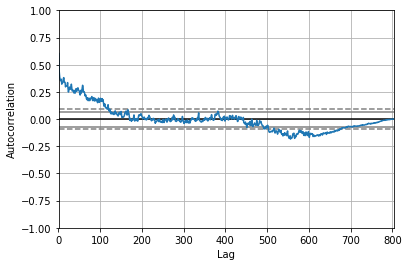

In [0]:
from pandas.plotting import autocorrelation_plot
 
row = train.iloc[105]
autocorrelation_plot(row)
pyplot.show()

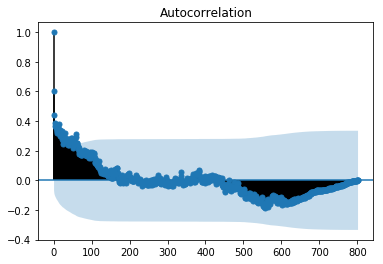

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(row.values)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  802
Model:                ARIMA(10, 1, 0)   Log Likelihood               -3091.666
Method:                       css-mle   S.D. of innovations             11.421
Date:                Thu, 09 May 2019   AIC                           6207.331
Time:                        08:10:16   BIC                           6263.576
Sample:                             1   HQIC                          6228.936
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.102      0.211      0.833      -0.179       0.222
ar.L1.D.y     -0.5144      0.035    -14.620      0.000      -0.583      -0.445
ar.L2.D.y     -0.4898      0.039    -12.437      0.0

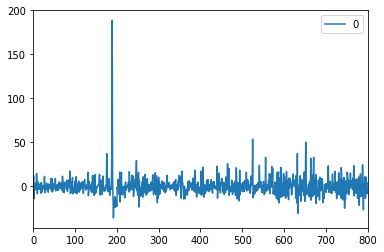

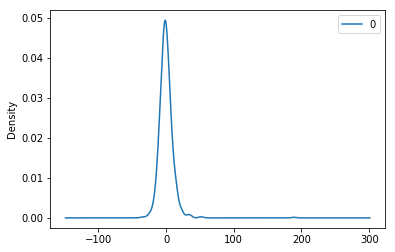

                0
count  802.000000
mean     0.006828
std     11.431120
min    -36.155013
25%     -5.648885
50%     -0.899827
75%      4.566269
max    188.652222


In [0]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model_arima = ARIMA(row.values, order=(10,1,0))
model_fit = model_arima.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [0]:
X = row.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [0]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit(disp=0)
	ypred = output[0]
	predictions.append(ypred)
	obs = test[t]
	history.append(obs)


Test MSE: 128.731


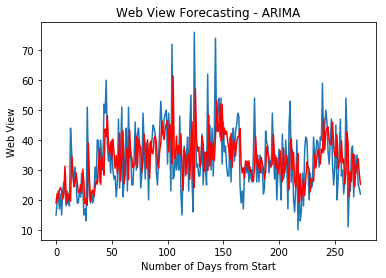

In [0]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.title('Web View Forecasting - ARIMA')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
pyplot.show()